In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Heart Disease Prediction using Machine Learning

### Target Variable
- `0` = No Heart Disease
- `1` = Heart Disease

### Feature Variables
- age, sex, chest pain type, resting bp s, cholesterol, fasting blood sugar, resting ecg, max heart rate, exercise angina, oldpeak, ST slope

## 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

print("All libraries imported successfully!")

All libraries imported successfully!


## 2. Load and Explore Data

In [3]:
df = pd.read_csv(r'/content/drive/MyDrive/Project/Dataset/Heart_Disease.csv')

print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
df.head()

Dataset Shape: (1190, 12)

First 5 rows:


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
# Dataset info
print("Dataset Info:")
print(df.info())
print("\nStatistical Summary:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB
None

Statistical Summary:


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [5]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print("\nTotal Missing:", df.isnull().sum().sum())

Missing Values:
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

Total Missing: 0


Target Distribution:
target
1    629
0    561
Name: count, dtype: int64

Percentage:
target
1    52.857143
0    47.142857
Name: proportion, dtype: float64


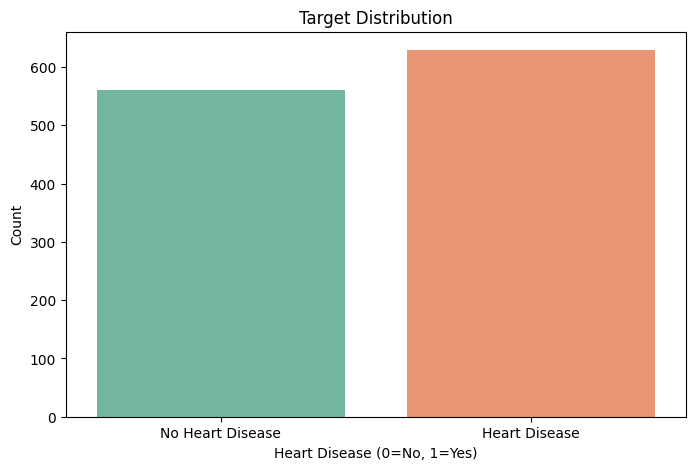

In [6]:
# Target distribution
print("Target Distribution:")
print(df['target'].value_counts())
print("\nPercentage:")
print(df['target'].value_counts(normalize=True) * 100)

plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Target Distribution')
plt.xlabel('Heart Disease (0=No, 1=Yes)')
plt.ylabel('Count')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'])
plt.show()

## 3. Exploratory Data Analysis (EDA)

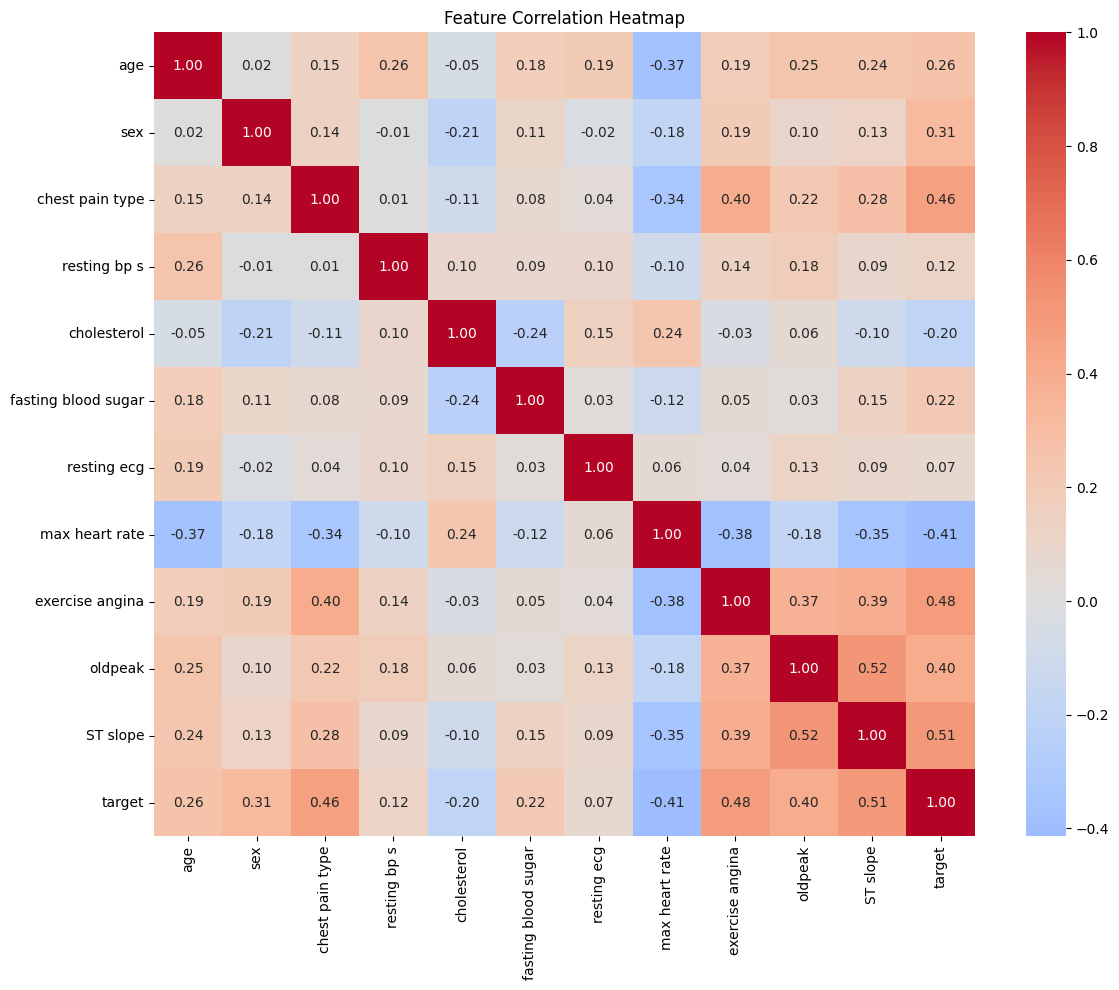

In [7]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

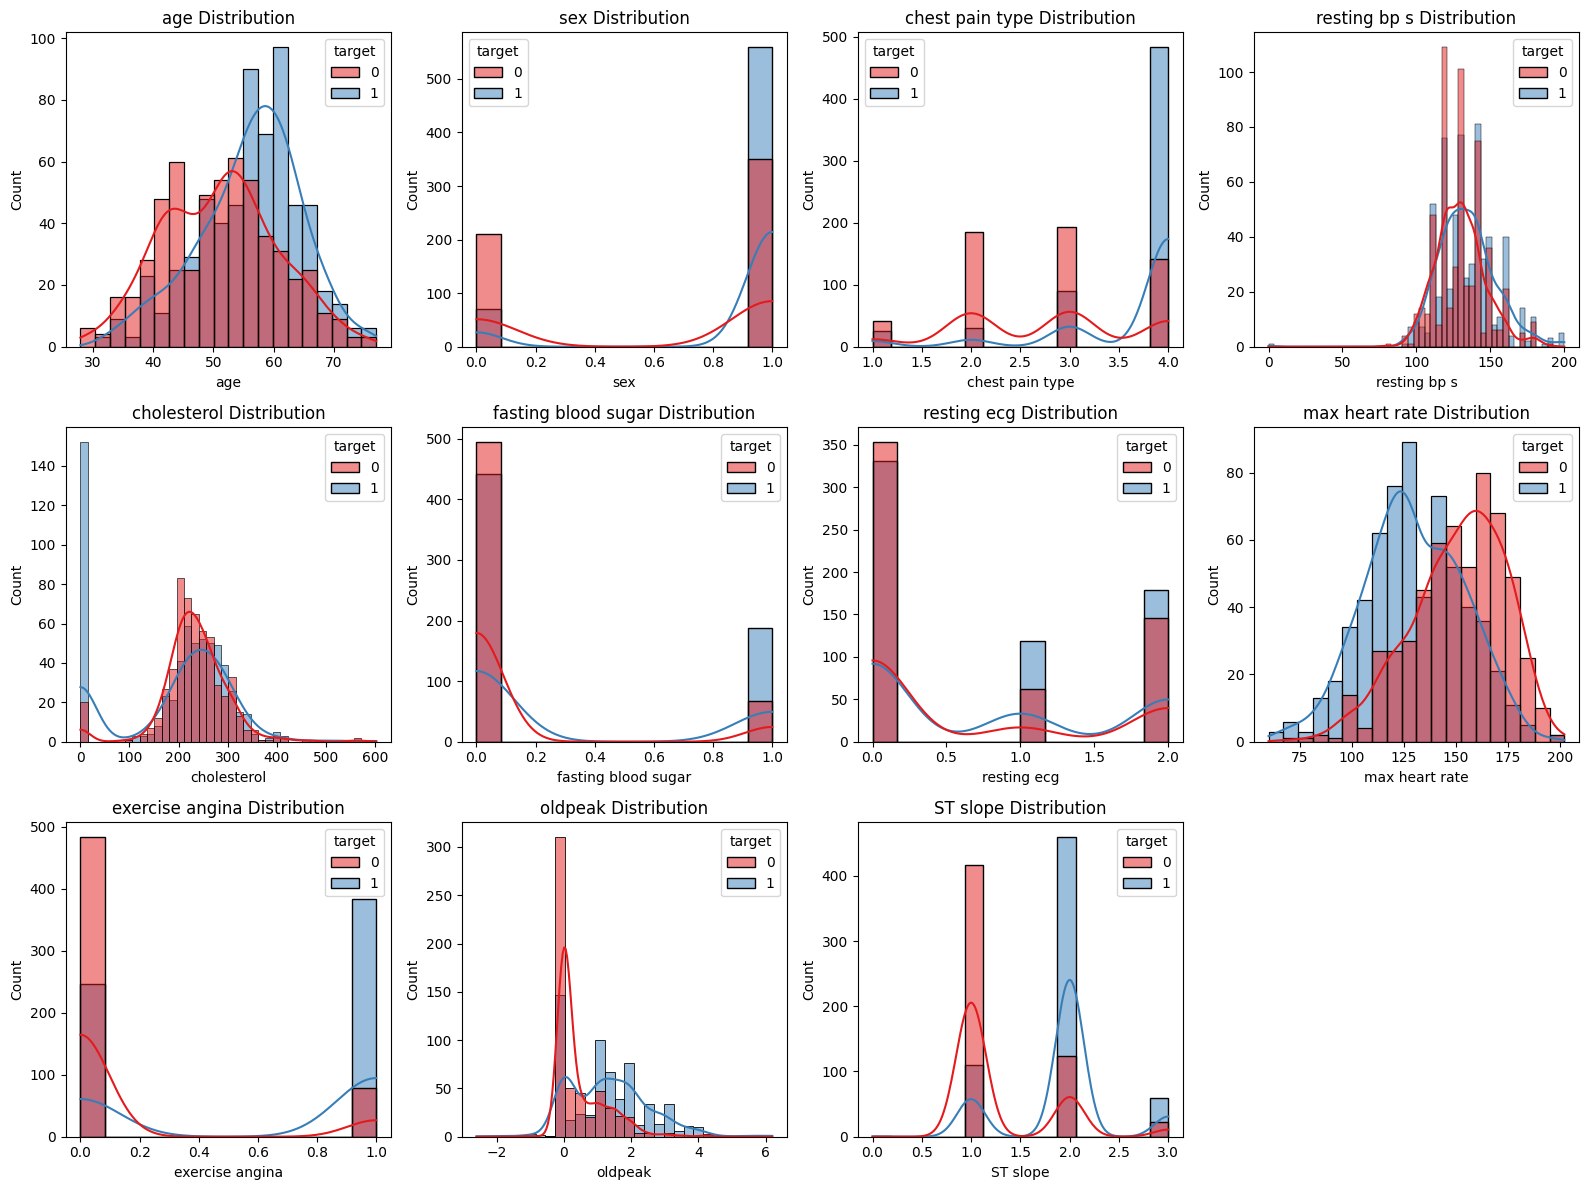

In [8]:
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
features = df.columns[:-1]  # All except target

for idx, feature in enumerate(features):
    row = idx // 4
    col = idx % 4
    sns.histplot(data=df, x=feature, hue='target', kde=True, ax=axes[row, col], palette='Set1')
    axes[row, col].set_title(f'{feature} Distribution')

# Hide empty subplot
axes[2, 3].axis('off')
plt.tight_layout()

## 4. Data Preprocessing

In [9]:
# Define features and target
feature_columns = ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
                   'fasting blood sugar', 'resting ecg', 'max heart rate',
                   'exercise angina', 'oldpeak', 'ST slope']

X = df[feature_columns]
y = df['target']

print("Features Shape:", X.shape)
print("Target Shape:", y.shape)
print("\nFeature Columns:")
print(feature_columns)

Features Shape: (1190, 11)
Target Shape: (1190,)

Feature Columns:
['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope']


In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])
print("\nTraining target distribution:")
print(y_train.value_counts())
print("\nTesting target distribution:")
print(y_test.value_counts())

Training set size: 952
Testing set size: 238

Training target distribution:
target
1    503
0    449
Name: count, dtype: int64

Testing target distribution:
target
1    126
0    112
Name: count, dtype: int64


In [11]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed!")
print("Scaled training data shape:", X_train_scaled.shape)

Feature scaling completed!
Scaled training data shape: (952, 11)


## 5. Model Training and Evaluation

### Helper Functions

In [12]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """
    Train and evaluate a model with comprehensive metrics
    """
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Probabilities for ROC-AUC
    if hasattr(model, 'predict_proba'):
        y_test_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_test_proba = model.decision_function(X_test)

    # Calculate metrics
    metrics = {
        'Model': model_name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Precision': precision_score(y_test, y_test_pred),
        'Recall': recall_score(y_test, y_test_pred),
        'F1 Score': f1_score(y_test, y_test_pred),
        'ROC-AUC': roc_auc_score(y_test, y_test_proba)
    }

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    metrics['CV Mean'] = cv_scores.mean()
    metrics['CV Std'] = cv_scores.std()

    # Print results
    print(f"\n{'='*50}")
    print(f"{model_name} Results")
    print(f"{'='*50}")
    print(f"Train Accuracy: {metrics['Train Accuracy']:.4f}")
    print(f"Test Accuracy:  {metrics['Test Accuracy']:.4f}")
    print(f"Precision:      {metrics['Precision']:.4f}")
    print(f"Recall:         {metrics['Recall']:.4f}")
    print(f"F1 Score:       {metrics['F1 Score']:.4f}")
    print(f"ROC-AUC:        {metrics['ROC-AUC']:.4f}")
    print(f"CV Score:       {metrics['CV Mean']:.4f} (+/- {metrics['CV Std']:.4f})")

    # Classification report
    print(f"\nClassification Report:")
    print(classification_report(y_test, y_test_pred, target_names=['No Disease', 'Heart Disease']))

    return model, metrics, y_test_pred, y_test_proba

In [15]:
def plot_confusion_matrix(y_test, y_pred, model_name):
    """
    Plot confusion matrix for a model
    """
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No Disease', 'Heart Disease'],
                yticklabels=['No Disease', 'Heart Disease'])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

### 5.1 Logistic Regression


Logistic Regression Results
Train Accuracy: 0.8298
Test Accuracy:  0.8403
Precision:      0.8438
Recall:         0.8571
F1 Score:       0.8504
ROC-AUC:        0.9041
CV Score:       0.8246 (+/- 0.0174)

Classification Report:
               precision    recall  f1-score   support

   No Disease       0.84      0.82      0.83       112
Heart Disease       0.84      0.86      0.85       126

     accuracy                           0.84       238
    macro avg       0.84      0.84      0.84       238
 weighted avg       0.84      0.84      0.84       238



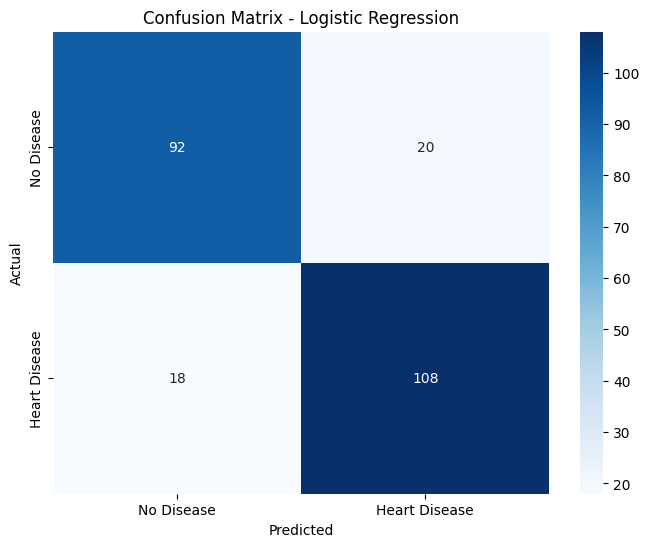

In [16]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model, lr_metrics, lr_pred, lr_proba = evaluate_model(
    lr_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Logistic Regression'
)
plot_confusion_matrix(y_test, lr_pred, 'Logistic Regression')

### 5.2 Random Forest


Random Forest Results
Train Accuracy: 1.0000
Test Accuracy:  0.9286
Precision:      0.9291
Recall:         0.9365
F1 Score:       0.9328
ROC-AUC:        0.9707
CV Score:       0.9097 (+/- 0.0172)

Classification Report:
               precision    recall  f1-score   support

   No Disease       0.93      0.92      0.92       112
Heart Disease       0.93      0.94      0.93       126

     accuracy                           0.93       238
    macro avg       0.93      0.93      0.93       238
 weighted avg       0.93      0.93      0.93       238



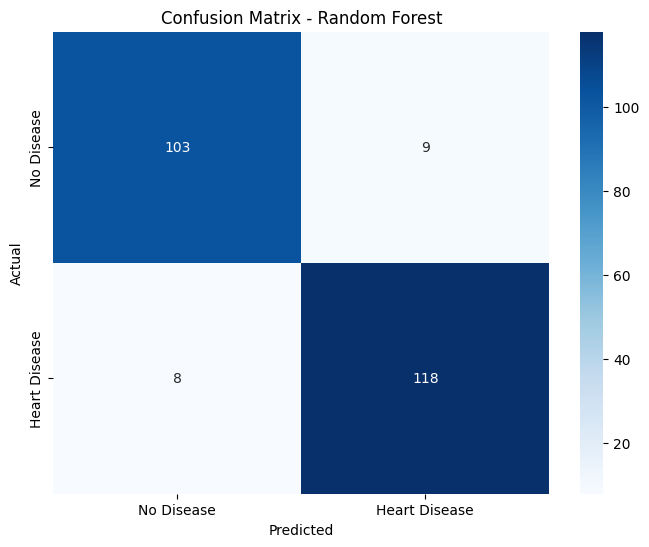

In [17]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf_model, rf_metrics, rf_pred, rf_proba = evaluate_model(
    rf_model, X_train_scaled, X_test_scaled, y_train, y_test, 'Random Forest'
)
plot_confusion_matrix(y_test, rf_pred, 'Random Forest')

### 5.3 Support Vector Machine (SVM)


SVM Results
Train Accuracy: 0.9034
Test Accuracy:  0.8782
Precision:      0.8647
Recall:         0.9127
F1 Score:       0.8880
ROC-AUC:        0.9352
CV Score:       0.8582 (+/- 0.0208)

Classification Report:
               precision    recall  f1-score   support

   No Disease       0.90      0.84      0.87       112
Heart Disease       0.86      0.91      0.89       126

     accuracy                           0.88       238
    macro avg       0.88      0.88      0.88       238
 weighted avg       0.88      0.88      0.88       238



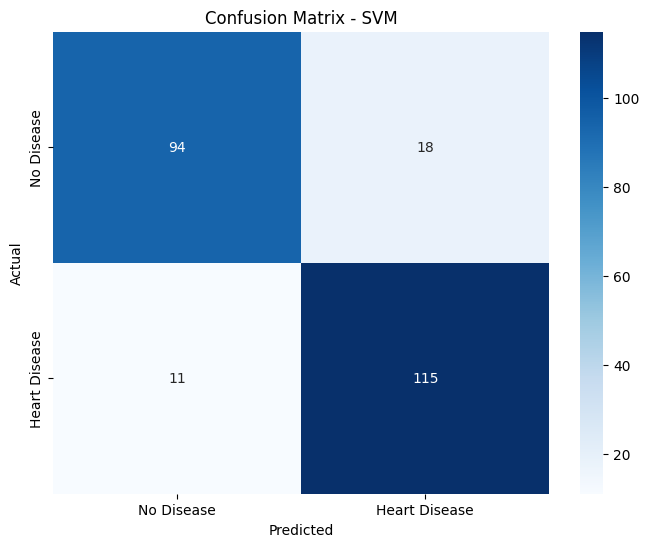

In [18]:
# Support Vector Machine
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model, svm_metrics, svm_pred, svm_proba = evaluate_model(
    svm_model, X_train_scaled, X_test_scaled, y_train, y_test, 'SVM'
)
plot_confusion_matrix(y_test, svm_pred, 'SVM')

### 5.4 XGBoost


XGBoost Results
Train Accuracy: 0.9905
Test Accuracy:  0.9244
Precision:      0.9355
Recall:         0.9206
F1 Score:       0.9280
ROC-AUC:        0.9649
CV Score:       0.8981 (+/- 0.0182)

Classification Report:
               precision    recall  f1-score   support

   No Disease       0.91      0.93      0.92       112
Heart Disease       0.94      0.92      0.93       126

     accuracy                           0.92       238
    macro avg       0.92      0.92      0.92       238
 weighted avg       0.92      0.92      0.92       238



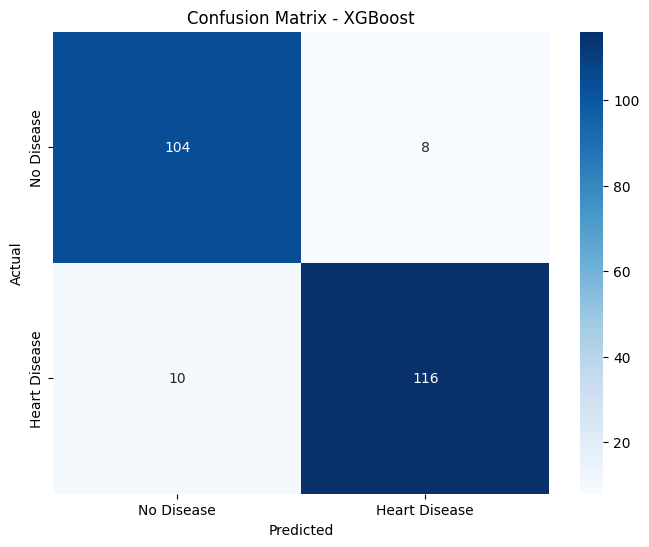

In [19]:
# XGBoost
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
xgb_model, xgb_metrics, xgb_pred, xgb_proba = evaluate_model(
    xgb_model, X_train_scaled, X_test_scaled, y_train, y_test, 'XGBoost'
)
plot_confusion_matrix(y_test, xgb_pred, 'XGBoost')

## 6. Model Comparison

In [20]:
# Compile all metrics
all_metrics = [lr_metrics, rf_metrics, svm_metrics, xgb_metrics]
results_df = pd.DataFrame(all_metrics)

# Display comparison table
print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)
display_cols = ['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC', 'CV Mean']
print(results_df[display_cols].to_string(index=False))


MODEL COMPARISON SUMMARY
              Model  Test Accuracy  Precision   Recall  F1 Score  ROC-AUC  CV Mean
Logistic Regression       0.840336   0.843750 0.857143  0.850394 0.904053 0.824613
      Random Forest       0.928571   0.929134 0.936508  0.932806 0.970734 0.909689
                SVM       0.878151   0.864662 0.912698  0.888031 0.935232 0.858225
            XGBoost       0.924370   0.935484 0.920635  0.928000 0.964853 0.898137


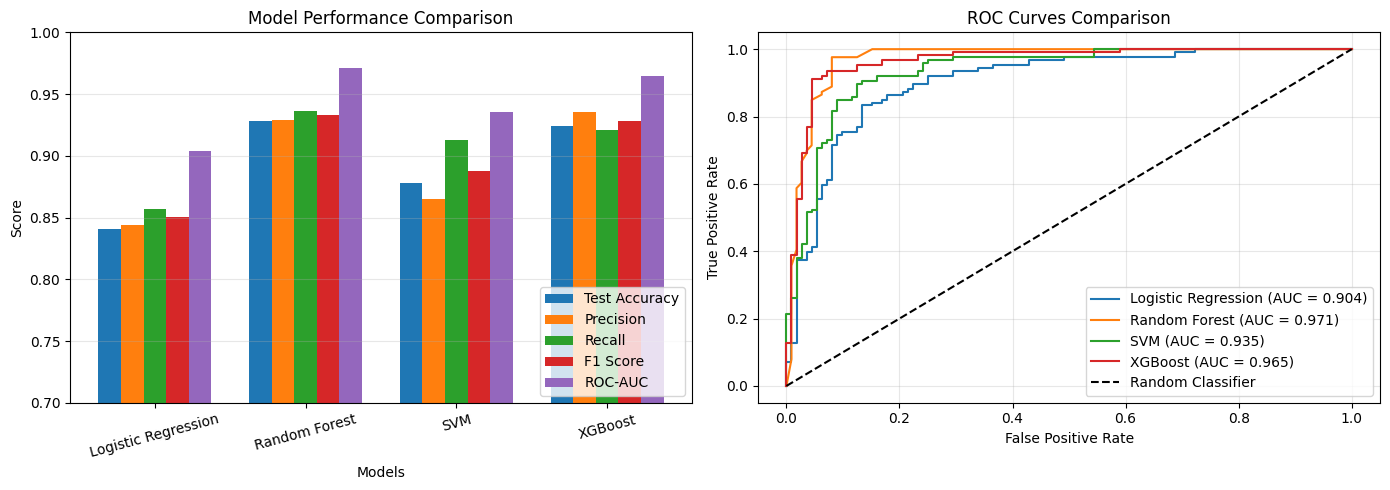

In [21]:
# Visualize model comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot of metrics
metrics_to_plot = ['Test Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC-AUC']
x = np.arange(len(results_df['Model']))
width = 0.15

for i, metric in enumerate(metrics_to_plot):
    axes[0].bar(x + i*width, results_df[metric], width, label=metric)

axes[0].set_xlabel('Models')
axes[0].set_ylabel('Score')
axes[0].set_title('Model Performance Comparison')
axes[0].set_xticks(x + width * 2)
axes[0].set_xticklabels(results_df['Model'], rotation=15)
axes[0].legend(loc='lower right')
axes[0].set_ylim([0.7, 1.0])
axes[0].grid(axis='y', alpha=0.3)

# ROC Curves
models_data = [
    ('Logistic Regression', lr_proba),
    ('Random Forest', rf_proba),
    ('SVM', svm_proba),
    ('XGBoost', xgb_proba)
]

for name, proba in models_data:
    fpr, tpr, _ = roc_curve(y_test, proba)
    auc = roc_auc_score(y_test, proba)
    axes[1].plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

axes[1].plot([0, 1], [0, 1], 'k--', label='Random Classifier')
axes[1].set_xlabel('False Positive Rate')
axes[1].set_ylabel('True Positive Rate')
axes[1].set_title('ROC Curves Comparison')
axes[1].legend(loc='lower right')
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Feature Importance Analysis

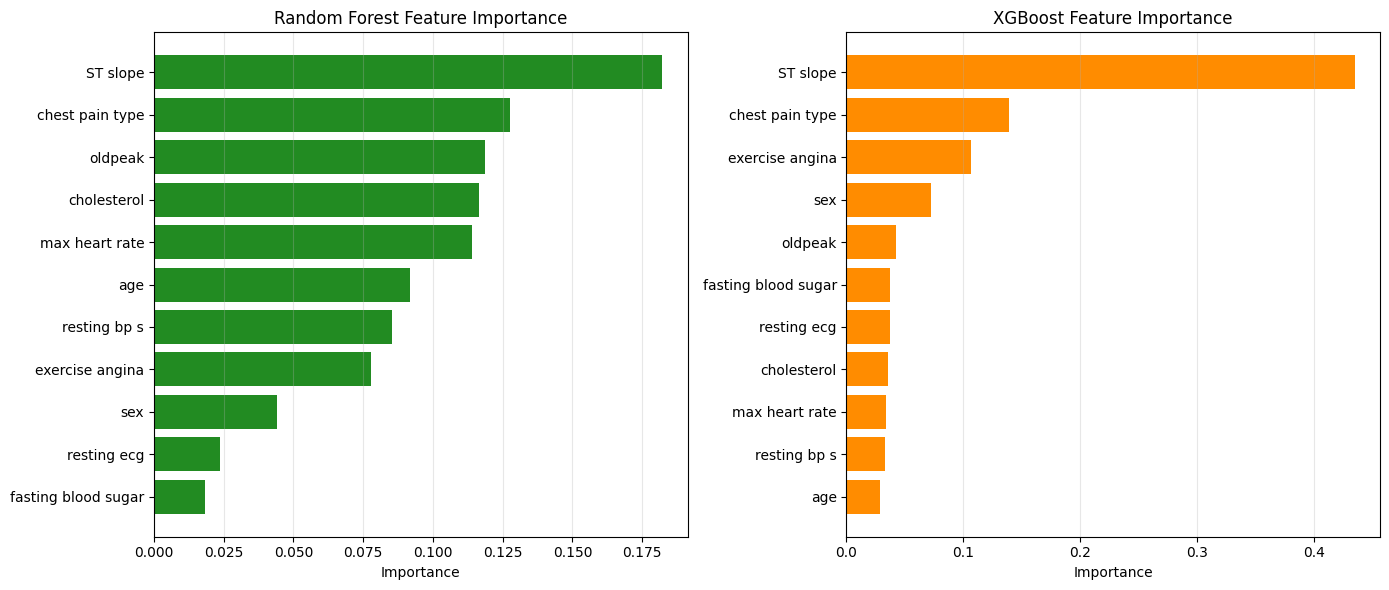

In [22]:
# Feature importance from Random Forest and XGBoost
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Random Forest Feature Importance
rf_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=True)

axes[0].barh(rf_importance['Feature'], rf_importance['Importance'], color='forestgreen')
axes[0].set_xlabel('Importance')
axes[0].set_title('Random Forest Feature Importance')
axes[0].grid(axis='x', alpha=0.3)

# XGBoost Feature Importance
xgb_importance = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=True)

axes[1].barh(xgb_importance['Feature'], xgb_importance['Importance'], color='darkorange')
axes[1].set_xlabel('Importance')
axes[1].set_title('XGBoost Feature Importance')
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

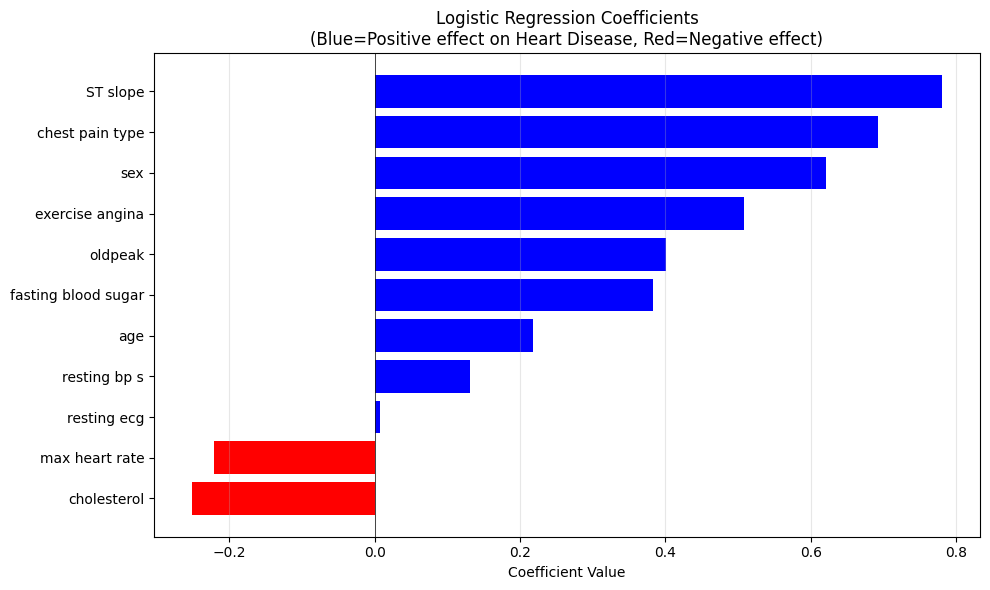

In [23]:
# Logistic Regression Coefficients
lr_coef = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values('Coefficient', ascending=True)

plt.figure(figsize=(10, 6))
colors = ['red' if x < 0 else 'blue' for x in lr_coef['Coefficient']]
plt.barh(lr_coef['Feature'], lr_coef['Coefficient'], color=colors)
plt.xlabel('Coefficient Value')
plt.title('Logistic Regression Coefficients\n(Blue=Positive effect on Heart Disease, Red=Negative effect)')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 8. Hyperparameter Tuning (Best Model)

In [24]:
# Find best performing model
best_model_name = results_df.loc[results_df['Test Accuracy'].idxmax(), 'Model']
print(f"Best performing model: {best_model_name}")
print(f"Performing hyperparameter tuning on {best_model_name}...")

Best performing model: Random Forest
Performing hyperparameter tuning on Random Forest...


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

TUNED RANDOM FOREST RESULTS
Test Accuracy: 0.9244
Precision:     0.9286
Recall:        0.9286
F1 Score:      0.9286
ROC-AUC:       0.9708

Classification Report:
               precision    recall  f1-score   support

   No Disease       0.92      0.92      0.92       112
Heart Disease       0.93      0.93      0.93       126

     accuracy                           0.92       238
    macro avg       0.92      0.92      0.92       238
 weighted avg       0.92      0.92      0.92       238



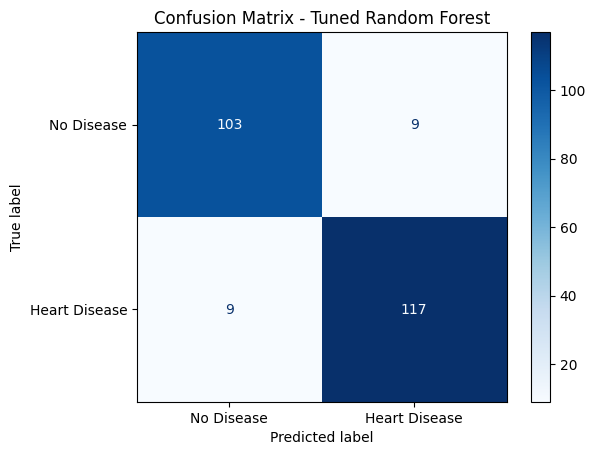

In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt

# ---------------------------
# 1️⃣ Define Model
# ---------------------------
rf = RandomForestClassifier(random_state=42)

# ---------------------------
# 2️⃣ Define Hyperparameter Grid
# ---------------------------
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# ---------------------------
# 3️⃣ Grid Search
# ---------------------------
rf_grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

rf_grid.fit(X_train, y_train)

print("Best Parameters:", rf_grid.best_params_)

# ---------------------------
# 4️⃣ Evaluate Best Model
# ---------------------------
best_rf = rf_grid.best_estimator_

y_pred = best_rf.predict(X_test)
y_proba = best_rf.predict_proba(X_test)[:, 1]

print("\n" + "="*50)
print("TUNED RANDOM FOREST RESULTS")
print("="*50)
print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision:     {precision_score(y_test, y_pred):.4f}")
print(f"Recall:        {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:      {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC:       {roc_auc_score(y_test, y_proba):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Disease', 'Heart Disease']))

# ---------------------------
# 5️⃣ Confusion Matrix Plot
# ---------------------------
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['No Disease', 'Heart Disease'])

disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()


## 9. Save Results

In [27]:
# Save model comparison results
results_df.to_csv('ml_model_comparison_results.csv', index=False)
print("Results saved to 'ml_model_comparison_results.csv'")

# Display final summary
print("\n" + "="*80)
print("FINAL MODEL COMPARISON SUMMARY")
print("="*80)
print(results_df[display_cols].to_string(index=False))
print("\n" + "="*80)
print(f"BEST MODEL: {results_df.loc[results_df['Test Accuracy'].idxmax(), 'Model']}")
print(f"Best Test Accuracy: {results_df['Test Accuracy'].max():.4f}")
print("="*80)

Results saved to 'ml_model_comparison_results.csv'

FINAL MODEL COMPARISON SUMMARY
              Model  Test Accuracy  Precision   Recall  F1 Score  ROC-AUC  CV Mean
Logistic Regression       0.840336   0.843750 0.857143  0.850394 0.904053 0.824613
      Random Forest       0.928571   0.929134 0.936508  0.932806 0.970734 0.909689
                SVM       0.878151   0.864662 0.912698  0.888031 0.935232 0.858225
            XGBoost       0.924370   0.935484 0.920635  0.928000 0.964853 0.898137

BEST MODEL: Random Forest
Best Test Accuracy: 0.9286


## 10. Prediction Function

In [28]:
def predict_heart_disease(model, scaler, patient_data):
    """
    Predict heart disease for a new patient

    Parameters:
    - model: trained model
    - scaler: fitted StandardScaler
    - patient_data: dict with patient features

    Returns:
    - Prediction and probability
    """
    # Create dataframe from patient data
    patient_df = pd.DataFrame([patient_data])
    patient_df = patient_df[feature_columns]  # Ensure correct order

    # Scale the data
    patient_scaled = scaler.transform(patient_df)

    # Make prediction
    prediction = model.predict(patient_scaled)[0]
    probability = model.predict_proba(patient_scaled)[0]

    result = "Heart Disease" if prediction == 1 else "No Heart Disease"

    print(f"Prediction: {result}")
    print(f"Probability of No Heart Disease: {probability[0]:.2%}")
    print(f"Probability of Heart Disease: {probability[1]:.2%}")

    return prediction, probability

# Example prediction
sample_patient = {
    'age': 55,
    'sex': 1,
    'chest pain type': 3,
    'resting bp s': 140,
    'cholesterol': 250,
    'fasting blood sugar': 0,
    'resting ecg': 0,
    'max heart rate': 150,
    'exercise angina': 0,
    'oldpeak': 1.0,
    'ST slope': 2
}

print("\nSample Patient Prediction:")
print("-" * 40)
predict_heart_disease(best_xgb, scaler, sample_patient)


Sample Patient Prediction:
----------------------------------------
Prediction: Heart Disease
Probability of No Heart Disease: 20.04%
Probability of Heart Disease: 79.96%


(np.int64(1), array([0.20040113, 0.7995989 ], dtype=float32))